<a href="https://colab.research.google.com/github/michaelchapa/dataVisualization_NewYork_AirborneDiseases/blob/master/dataVisualization_NewYork_InfectiousDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Does weather cause viral infections?</h1>
<p>We explore the relationship through plotting 2 viral infection datasets.
<p>The datasets <code>measles & mumps</code> are composed of 40 years of monthly cases in New York City. </p>
<br>
<h3>Importing data/ Pre-processing</h3>
<p>They're loaded into DataFrames and will be our primary source for plotting throughout this Notebook.</p>
<p>Below is an example of the contents of each DataFrame:</p>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%% load data
months = ['January', 'February', 'March', 'April', 'May', 'June', 
           'July', 'August', 'September', 'October', 'November', 'December']

measles = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                      'dataVisualization_NewYork_AirborneDiseases/master/' \
                      'Measles.csv', index_col = 0, names = months)
mumps = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                    'dataVisualization_NewYork_AirborneDiseases/master/' \
                    'Mumps.csv', index_col = 0, names = months)

print('Measles cases in New York from 1931 to 1971 by Month:\n', measles.head())

Measles cases in New York from 1931 to 1971 by Month:
       January  February  March  April  ...  September  October  November  December
1931      750      2010   4858   6172  ...         43       54        93       134
1932      146       270    621   1096  ...        118      149       594      1183
1933     1960      4699   9635   9573  ...         50       55        71       131
1934      133       168    431    652  ...         47       45        86       205
1935      508      1576   4357   6630  ...         67      136       333       555

[5 rows x 12 columns]


<h3>Quick look at cases</h3>
<p>From our plot we can see there was a Measles epidemic in 1940</p>
<p>More info:<br> www.pubmed.ncbi.nlm.nih.gov/15406756/</p>
<p>Measles epidemic in the Mott Haven Health Center District, New York City, November, 1940-April, 1941</p>
<br>
<p>Notice Measles cases outnumber Mumps cases by 3 times in incidence.</p>



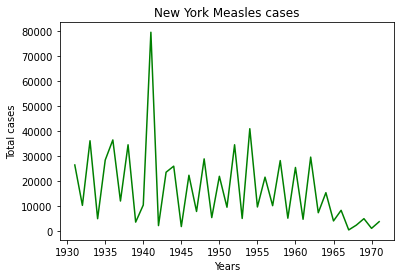

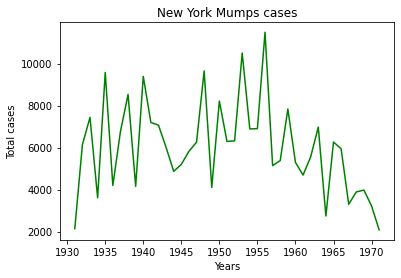

In [23]:
def plot_Line_Cases_Years(disease, diseaseName):
    years = disease.index.values
    totals = disease.sum(axis = 1)
    
    plt.figure()
    plt.title('New York ' + diseaseName + ' cases')
    plt.xlabel('Years')
    plt.ylabel('Total cases')
    plt.plot(years, totals, color = 'green')
    plt.show()

# bar Plots of each disease
plot_Line_Cases_Years(measles, 'Measles')
plot_Line_Cases_Years(mumps, 'Mumps')

<h3>Measles, Mumps and a Vaccine</h3>
<p>In 1963, John Enders and colleagues transformed their Edmonston-B strain of measles virus into the measles-mumps-rubella (MMR) vaccine.</p>
<p>Beginning in 1963 we can observe a drop-off in cases at the tail end of our plot.</p>
<p><em>The Y-axis has been log-scaled to make the case range less wide.</em></p>

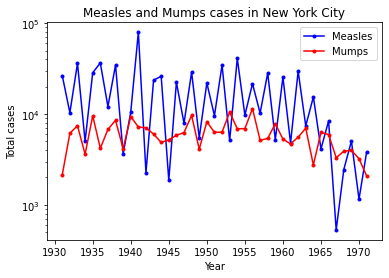

In [24]:
def plot_Line_Log_Cases_Years(disease1, disease2, names):
    years = disease1.index.values
    disease1Totals = disease1.sum(axis = 1)
    disease2Totals = disease2.sum(axis = 1)
    
    plt.figure()
    plt.title(names[0] + ' and ' + names[1] + ' cases in New York City')
    plt.xlabel('Year')
    plt.ylabel('Total cases')
    plt.yscale('log')
    plt.plot(years, disease1Totals, 'b.-', 
             years, disease2Totals, 'r.-')
    plt.legend(names)
    plt.show()

plot_Line_Log_Cases_Years(measles, mumps, ['Measles', 'Mumps'])

<h2>Coincidental Correlation</h2>
<p>There is a coincidental correlation when scatter-plotting the cases against each other. They share some common Causal Variable. We explore weather as the causality in the next section.</p>
<p><em>X-axis and Y-axis are log-scaled for normalization.

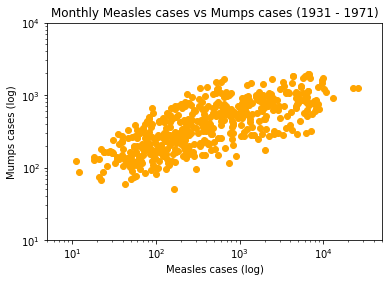

In [25]:
def plot_Scatter_Cases_Versus(disease1, disease2, names):
    label = ' cases (log)'
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Monthly ' + names[0] + ' cases vs ' + names[1] + ' cases ' \
              + '(1931 - 1971)')
    plt.xlabel(names[0] + label)
    plt.ylabel(names[1] + label)
    plt.axis([5, 10**4.7, 10, 10**4])
    plt.scatter(disease1, disease2, color = 'orange')
    plt.show()

#%% Log plot of Measles agains Mumps cases
plot_Scatter_Cases_Versus(measles, mumps, ['Measles', 'Mumps'])

<h2>Weather, the causal relation to case incidence</h2>
<p>We observe cases rise in November and continue to rise through January as winter weather worsens. January through March the wind is the sharpest and there are the most snow-storms. April is still too cold to be comfortable outside. Late April you'll start to see Spring. May and June are the transition seasons to hotter weather. By July we observe the cases are lower. Autumn shows the lowest cases and very favorable weather.</p>
<p>A casaul relationship exists between weather and cases. Perhaps people are indoors more often due to the cold and are transmitting the virus through their proximity.</p>

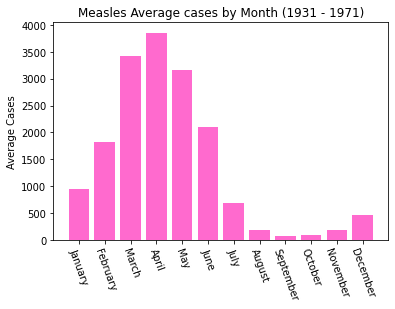

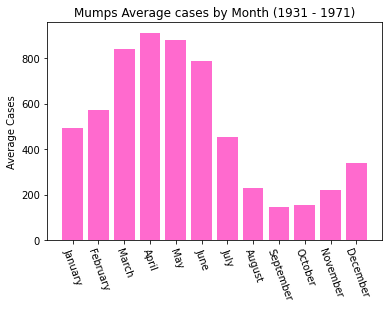

In [26]:
def plot_Bar_Cases_Month(disease, name):
    months = disease.columns.values
    monthAvgs = disease.mean()
    
    plt.figure()
    plt.title(name + ' Average cases by Month (1931 - 1971)')
    plt.ylabel('Average Cases')
    plt.bar(months, monthAvgs, color = '#FF6ACE')
    plt.xticks(months, rotation = -70)
    plt.show()

#%% Average number of mumps cases for each month of the year
plot_Bar_Cases_Month(measles, 'Measles')
plot_Bar_Cases_Month(mumps, 'Mumps')